# Employee Analytics and Attrition Prediction Model.

## Objective:
The primary purpose of this project is to unvel hidden insughts in a HR dataset as well as predict employee exits depending on various metrics such as satisfaction levels, performance reviews,promotions etc. 

## Table of Contents:
1. Loading the Required Libraries.
2. Loading the dataset.
3. Data Wrangling.
4. Data Mining.
5. Building the HR Attrition Model.
6. Conclusion.
7. Application.

### Loading the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import scipy 
import matplotlib.pyplot as plt
import xgboost

%matplotlib inline

### Loading the dataset

In [2]:
df = pd.read_excel("D:\others\Personal Projects 2\Practice Files July 2024\HR Employee Analytics\HR_Employee_Data.xlsx")

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Alvin\AppData\Local\Temp\ipykernel_76860\3708157991.py:1: SyntaxWarning: invalid escape sequence '\o'
  df = pd.read_excel("D:\others\Personal Projects 2\Practice Files July 2024\HR Employee Analytics\HR_Employee_Data.xlsx")


,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.tail()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,IND40221,0.40,0.57,2,151,3,0,1,0,support,low
14995,IND24196,0.37,0.48,2,160,3,0,1,0,support,low
14996,IND33544,0.37,0.53,2,143,3,0,1,0,support,low
14997,IND40533,0.11,0.96,6,280,4,0,1,0,support,low
14998,IND11649,0.37,0.52,2,158,3,0,1,0,support,low


### Data Wrangling

In [4]:
df.shape

(14999, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [6]:
## finding out if there are any null values

df.isnull().sum()

Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
## finding out if there are any duplicates

df.duplicated().sum()

0

Text(0.5, 0, 'Count')

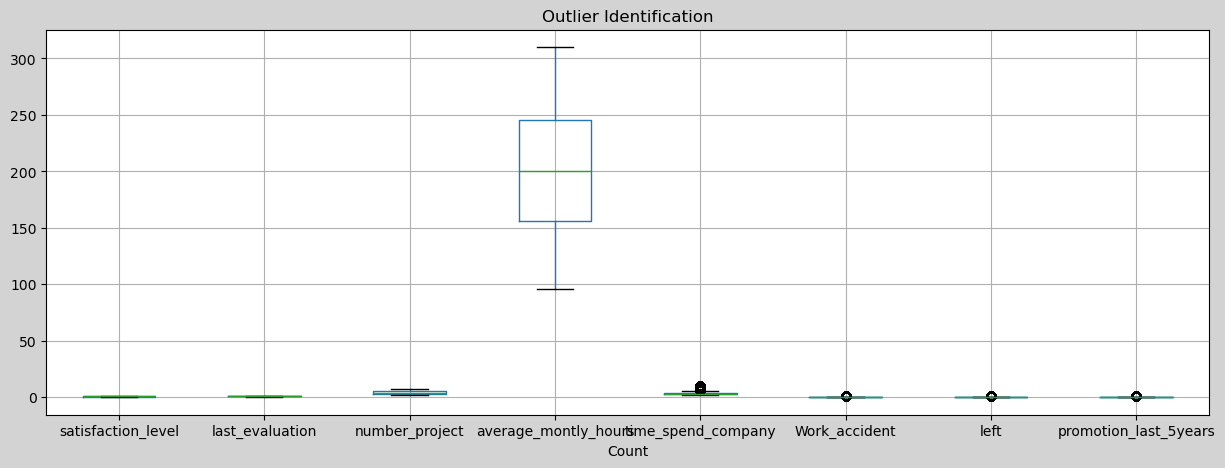

In [8]:
## checking for any outliers

plt.figure(figsize=(15,5), facecolor="lightgrey")
df.boxplot()
plt.grid(True)
plt.title("Outlier Identification")
plt.xlabel("Count")

In [9]:
## renaming columns

df = df.rename(columns = {
    "Emp_Id" : "Employee ID",
    "satisfaction_level" : "Satisfaction Level",
    "last_evaluation" : "Previous Evaluation",
    "number_project" : "Projects Undertaken",
    "average_montly_hours" : "Average Monthly Hours",
    "time_spend_company" : "Years Worked",
    "Work_accident" : "Work Accidents",
    "left" : "Exited",
    "promotion_last_5years" : "Promotions In The Last 5 Years",
    "salary" : "Salary Category"
})

df.head(3)

,Employee ID,Satisfaction Level,Previous Evaluation,Projects Undertaken,Average Monthly Hours,Years Worked,Work Accidents,Exited,Promotions In The Last 5 Years,Department,Salary Category
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium


In [10]:
df["Department"] = df["Department"].replace({
    "sales" : "Sales",
    "accounting" : "Accounting",
    "hr" : "HR",
    "technical" : "Technical",
    "support" : "Support",
    "management" : "Management",
    "product_mng" : "Product Management",
    "marketing" : "Marketing",
    "RandD" : "R & D"
})

### Data Mining

In [11]:
## total number of employees

employees = pd.DataFrame(df["Employee ID"].unique())
employees = employees.rename(columns = { 0 : "Employee ID"})
print("Total Number of Employees:", employees["Employee ID"].value_counts().sum())

Total Number of Employees: 14999


In [12]:
## number of departments

departments = pd.DataFrame(df["Department"].unique())
departments = departments.rename(columns = { 0 : "Departments"})
print("Number of Departments:" , departments["Departments"].value_counts().sum())

Number of Departments: 10


In [13]:
## total average monthly hours

avg_hours = df["Average Monthly Hours"].mean()

## rounding off the mean to 2 dp
print("Average Monthly Hours:", round(avg_hours,2))

Average Monthly Hours: 201.05


In [14]:
## average years worked

print("Average Years Worked:", round(df["Years Worked"].mean(),2))

Average Years Worked: 3.5


In [15]:
## total number of promotions

print("Total Number of Promotions:", df["Promotions In The Last 5 Years"].sum())

Total Number of Promotions: 319


#### Exploratory Data Analysis

In [16]:
## summary statistics of the dataset

df.describe()

,Satisfaction Level,Previous Evaluation,Projects Undertaken,Average Monthly Hours,Years Worked,Work Accidents,Exited,Promotions In The Last 5 Years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
## more descriptive statistics 

from scipy.stats import describe

numeric = df.drop(["Employee ID", "Salary Category", "Department"], axis = 1)

description = describe(numeric)


## printing the above output
for key, value in description._asdict().items():
    print(f"{key} : {value}")

nobs : 14999
minmax : (array([9.0e-02, 3.6e-01, 2.0e+00, 9.6e+01, 2.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00]), array([  1.,   1.,   7., 310.,  10.,   1.,   1.,   1.]))
mean : [6.12833522e-01 7.16101740e-01 3.80305354e+00 2.01050337e+02
 3.49823322e+00 1.44609641e-01 2.38082539e-01 2.12680845e-02]
variance : [6.18172006e-02 2.92988644e-02 1.51928391e+00 2.49431317e+03
 2.13199781e+00 1.23705940e-01 1.81411338e-01 2.08171410e-02]
skewness : [-0.4763127  -0.02661909  0.33767184  0.0528367   1.8531337   2.0209466
  1.22991957  6.63630462]
kurtosis : [-0.67103501 -1.23902728 -0.4957128  -1.13500325  4.7712197   2.08422518
 -0.48729785 42.04053902]


##### Univariate analysis

Text(0.5, 1.0, 'Satisfaction Levels Distribution')

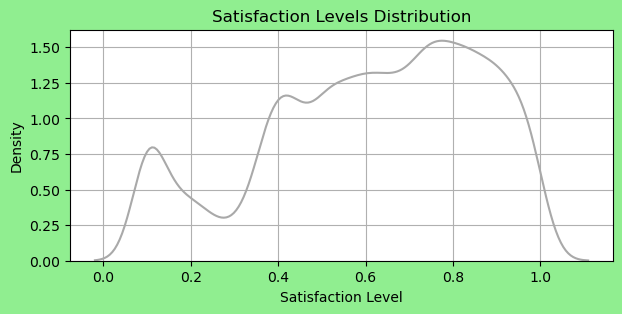

In [18]:
## satisfaction levels distribution

plt.figure(figsize=(7,3), facecolor="lightgreen")
sns.kdeplot(df, x="Satisfaction Level", color = "darkgrey")
plt.grid(True)
plt.title("Satisfaction Levels Distribution")

###### The satisfaction levels have no specific distribution.

Text(0.5, 1.0, 'Previous Evaluation Distribution')

<Figure size 700x300 with 0 Axes>

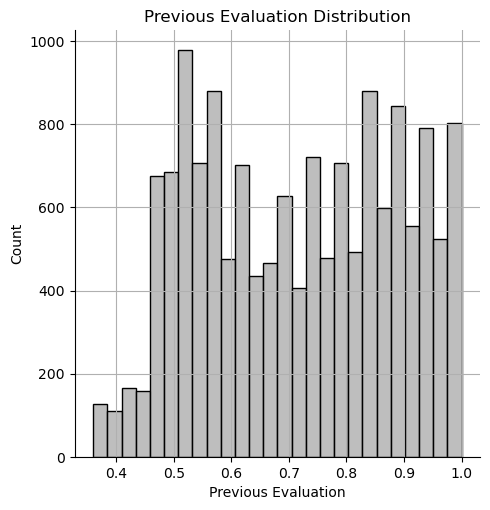

In [19]:
## previous evaluations distribution

plt.figure(figsize=(7,3), facecolor="pink")
sns.displot(df, x="Previous Evaluation", color = "darkgrey")
plt.grid(True)
plt.title("Previous Evaluation Distribution")

###### The previous evaluations have no specific distribution.

Text(0.5, 1.0, 'Exited Distribution')

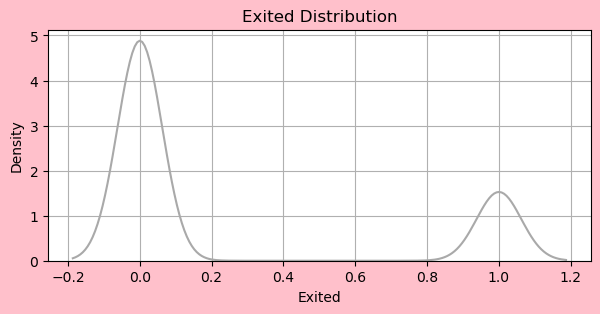

In [20]:
## previous evaluations distribution

plt.figure(figsize=(7,3), facecolor="pink")
sns.kdeplot(df, x="Exited", color = "darkgrey")
plt.grid(True)
plt.title("Exited Distribution")

###### The exited column has a double normal distribution around 1 and 0.

Text(0.5, 1.0, 'Years Worked Distribution')

<Figure size 500x200 with 0 Axes>

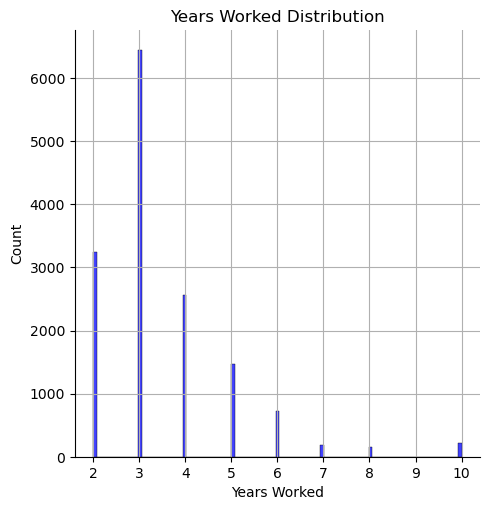

In [21]:
## Years Worked distribution

plt.figure(figsize=(5,2), facecolor="pink")
sns.displot(df, x="Years Worked", color = "blue")
plt.grid(True)
plt.title("Years Worked Distribution")

###### The years worked has a left-skewed distribution.

##### Bivariate Analysis

Text(0.5, 1.0, 'Satisfaction Levels and Earnings per Department')

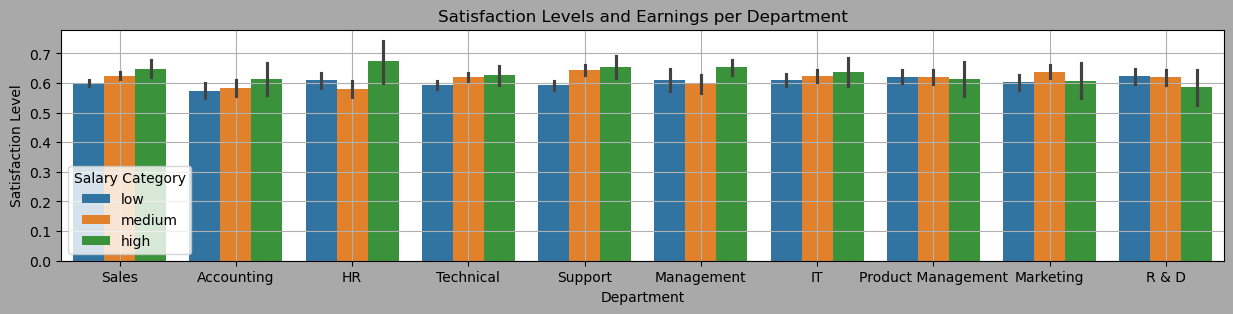

In [22]:
## Satisfaction Levels and Earnings per Department

plt.figure(figsize=(15,3), facecolor="darkgrey")
sns.barplot(df, x = "Department", y = "Satisfaction Level", hue="Salary Category")
plt.grid(True)
plt.title("Satisfaction Levels and Earnings per Department")

###### HR Department earn the most

##### Multivariate analysis

Text(0.5, 1.0, 'Correlation Between Numeric Variables')

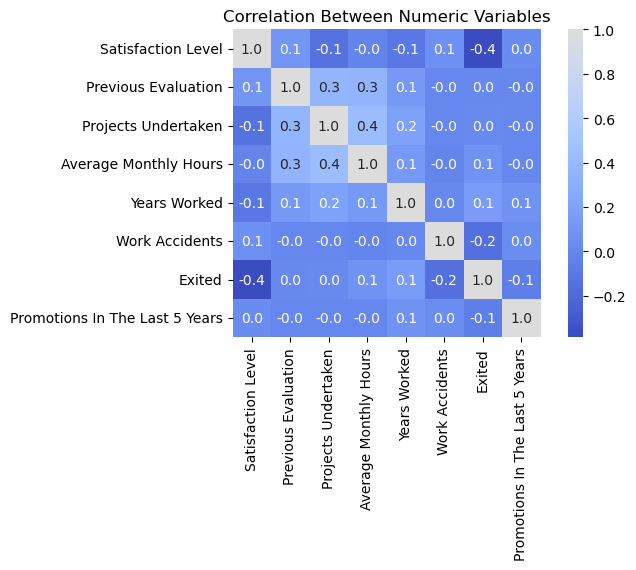

In [23]:
## correlation between variables

correlation = numeric.corr()

plt.figure(figsize=(7,4))
sns.heatmap(correlation, annot=True, annot_kws={"size" : 10}, cmap="coolwarm", square=True, center=True, fmt=".1f", cbar=True)
plt.title("Correlation Between Numeric Variables")

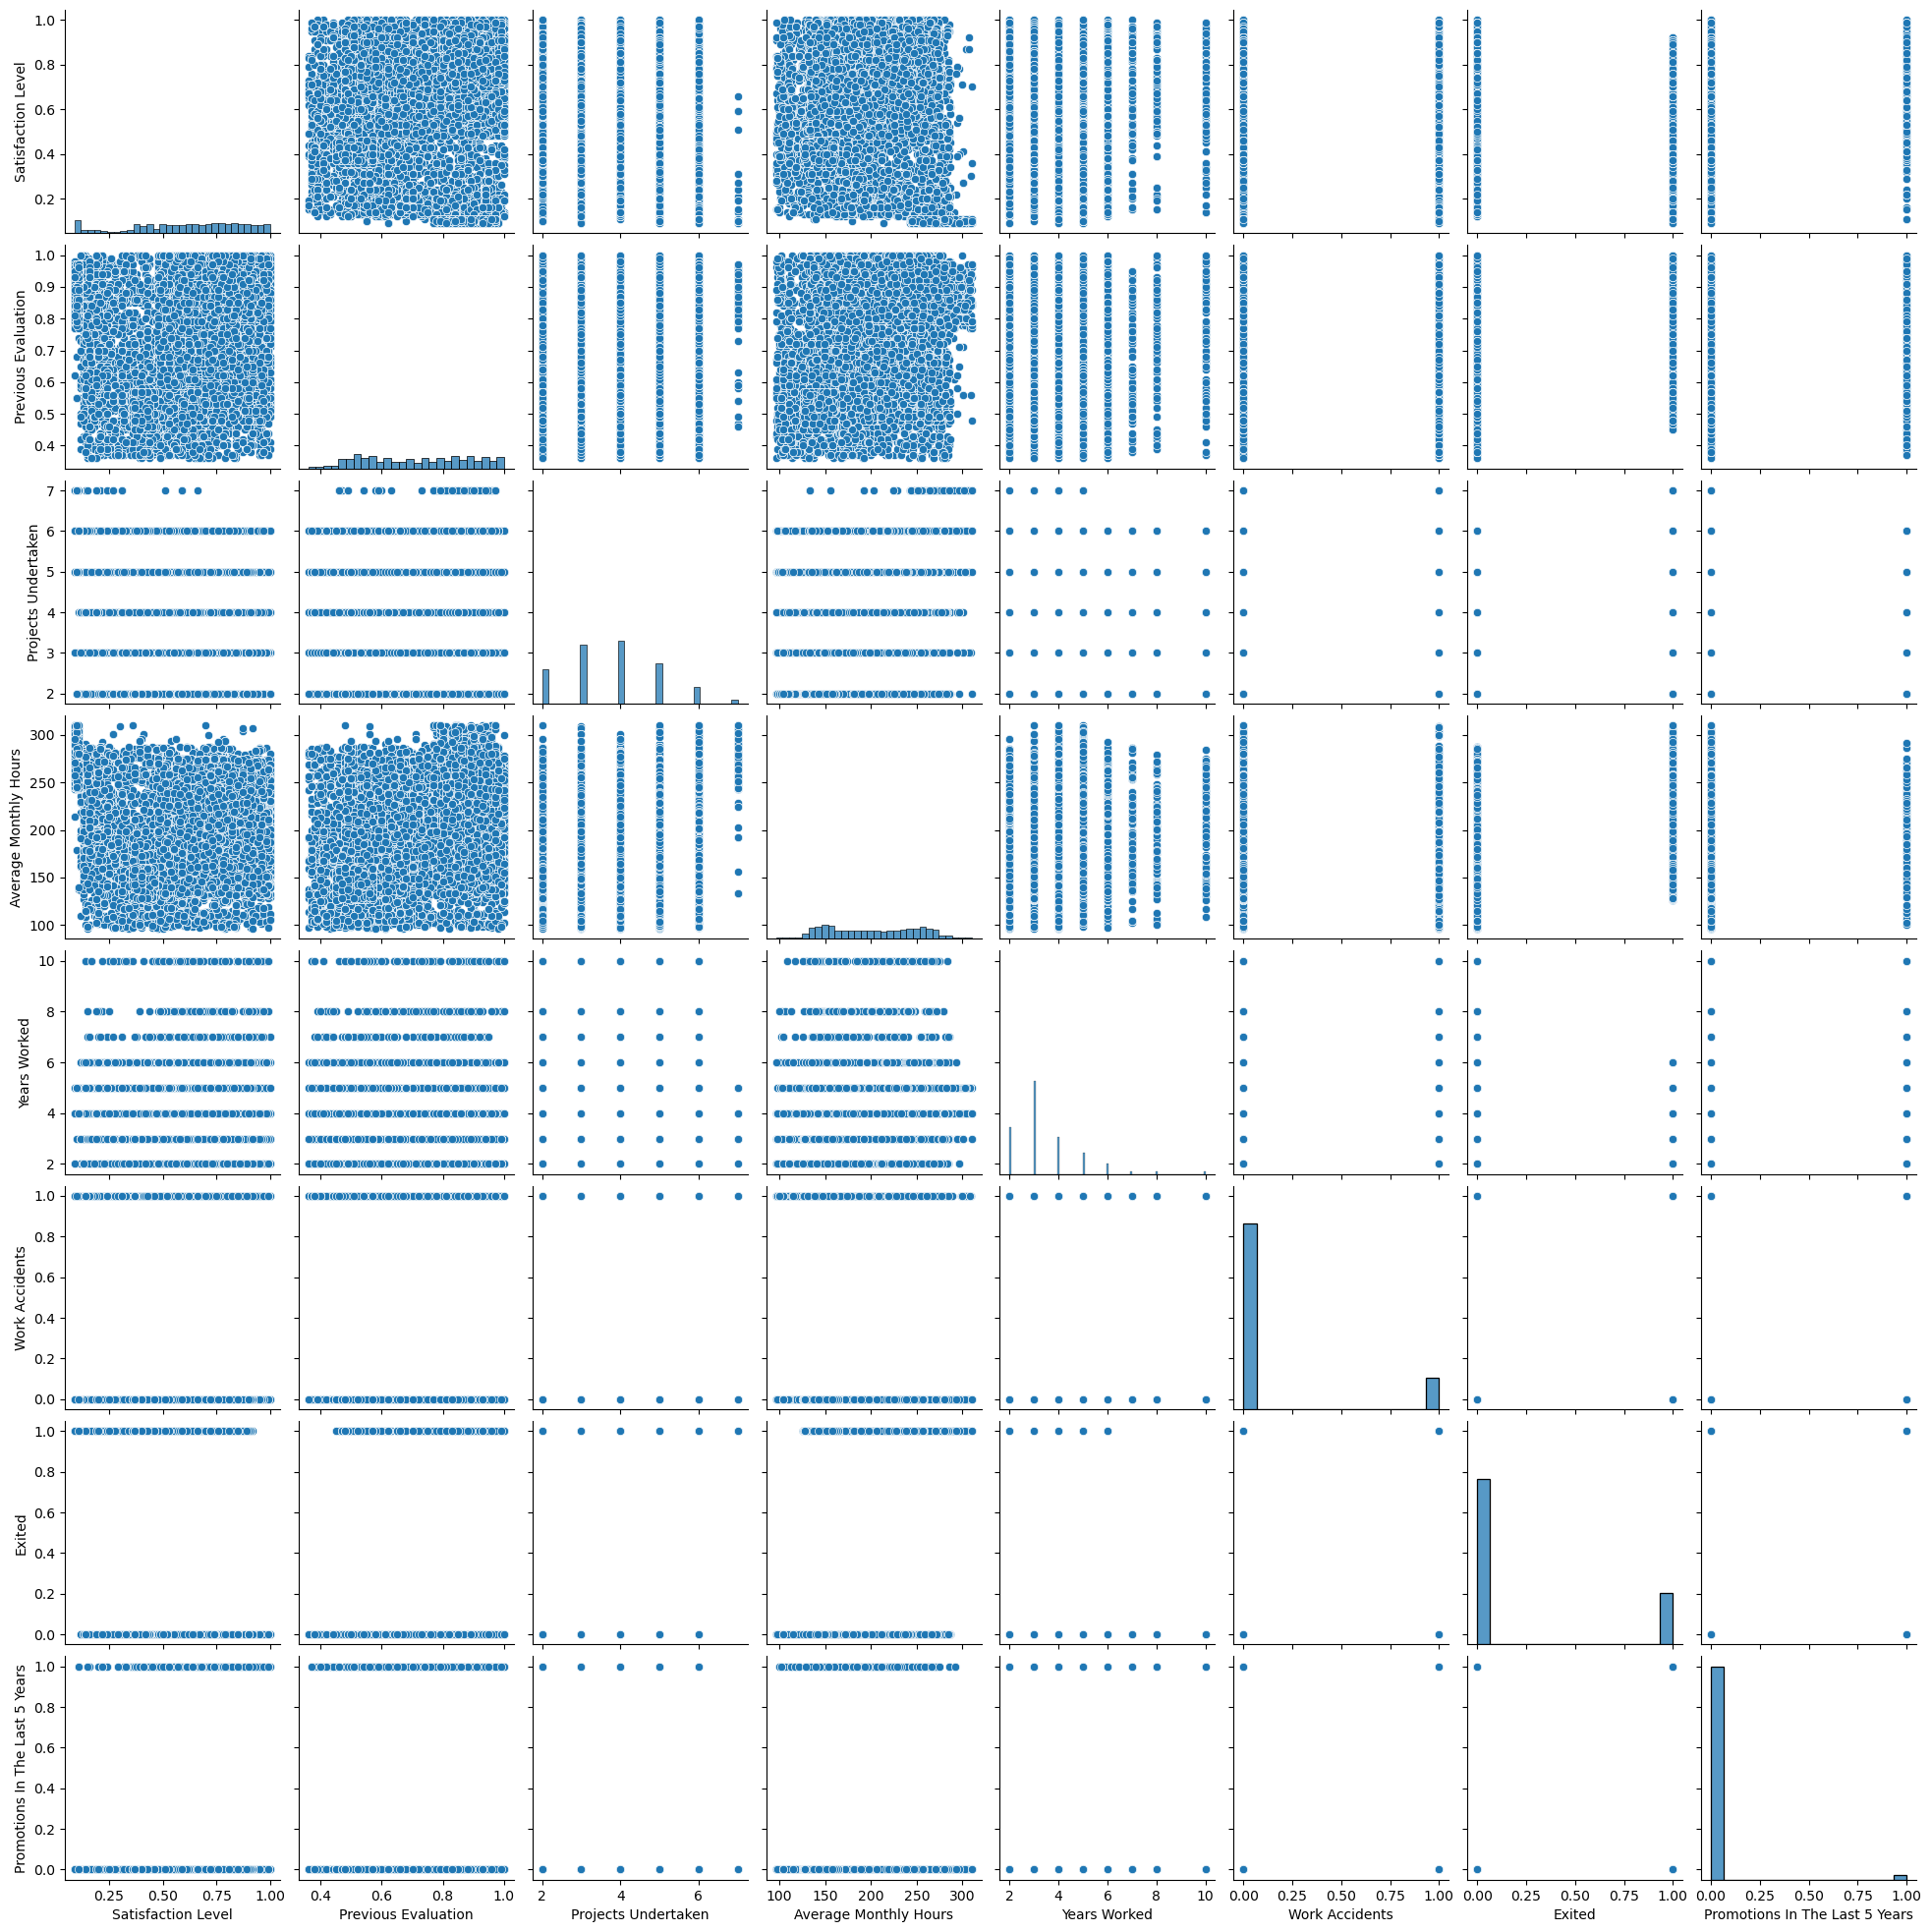

In [24]:
## relationship among variables

sns.pairplot(df)

### Building the HR Attrition model.

In [25]:
## Defining the independent and dependent variables

X = numeric.drop(["Exited"], axis = 1)
y = numeric["Exited"]

In [27]:
## dividing the model into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=20)

In [35]:
## scaling the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
## loading the model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [37]:
## fitting the model

lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
## finding out the intercept

lr.intercept_

array([-1.50275568])

In [39]:
## checking for coefficients

lr.coef_

array([[-1.00313692,  0.0936418 , -0.36031485,  0.21430556,  0.33177571,
        -0.55252428, -0.21789899]])

In [40]:
## predicting the model

pred = lr.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [41]:
## checking for the model accuracy using the confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[2681,  196],
       [ 638,  235]], dtype=int64)

In [43]:
## calculating the accuracy

round((2681 + 235) / (2681 + 235 + 638 + 196),2)

0.78

### Conclusion:
The model has an accuracy of 78% makig it a good predictor of employee attrition.

### Application:
This model can be used in:
1. formulating effective HR policies.
2. performing employee psycho-analysis investigations.

Similarly, this model can be used in predicting customer churn in other department and sectors.